# Task overview
In this homework assignment, you will implement a simple Transformer architecture using only basic layers such as nn.Embedding, nn.Linear, ReLU, softmax, and einsum. This will be a decoder-only model (language model), trained on a toy problem. You will analyze the results of the baseline Transformer and results with some minor changes to its components.

# Dataset
The dataset has already been generated for you. It is an artificial and simple dataset that was designed to make training quick and debugging easy. Each example in the dataset consists of a sequence of tokens, with each token represented by a number from 0 to 9. The length of each sequence is 64 tokens. Each and every sequence starts with token 0 (zero).

This is a language modeling task, which means that your model's task is to predict the next token in the sequence. Specifically, for each prefix of the input sequence, your model will generate a prediction for the token that should follow.

The dataset was generated in a particular way, but you don't need to know the details in order to complete the homework assignment. These details are provided in the code that generates the dataset. However, as an overview, we can see some patterns emerging in the following example sequences:

* [0, 1, 0, 1, 0, 1, 0, 1, 2, 3, 4, 2, 3, 4, 2, 3, 7, 8, 6, 7, 8, 6, 9, 4, ...]
  * In this example, 0 seems to always be followed by 1.
* [0, 4, 9, 7, 8, 9, 0, 4, 5, 2, 8, 5, 2, 8, 5, 2, 3, 4, 5, 2, 8, 9, 0, 4, ...]
  * Here, however, 0 is followed by 4.
* [0, 1, 2, 3, 4, 5, 3, 4, 7, 8, 0, 1, 2, 5, 3, 4, 7, 8, 0, 1, 6, 9, 2, 5, ...]
  * In every example we can see that the number N is often followed by N+1.


Each example is constructed with random patterns. In order to accurately predict the next token, your model will need to learn these patterns "on the fly" as it processes each example. This is called "in-context learning," where the model learns how to figure out the pattern instead of learning the pattern during training.

# Model implementation (60% points)
For this homework assignment, you will be implementing a version of the Transformer architecture with only the decoder, also known as a language model. Models from GPT family, like ChatGPT, are similar to what you will be implementing. In fact, ChatGPT even helped improve the readability and quality of writing in this homework assignment. A Transformer is helping to teach Transformers!

You can read the original paper introducing the Transformer for more details: https://arxiv.org/pdf/1706.03762.pdf.

Your model will consist of the following components:

* Learnable, randomly initialized embeddings (using nn.Embedding)
* Positional encoding
* A number of decoding blocks, each consisting of:
  * Multi-head attention (wrapped in a residual connection)
  * Feed-forward layer (wrapped in a residual connection)
* A linear layer to get the output probabilities

The general structure is already provided in the code. You will need to implement the following classes and functions:

* get_positional_encoding
* Attention
* FeedForward
* DecoderBlock

The DecoderModel has already been implemented, but you are welcome to change it if necessary for visualizations, etc. In general, you are free to change any part of the provided code if it makes it easier for you to implement something. 

# Model training (10% points)
The training loop has already been implemented, and it is up to you to decide on the model and learning parameters to use. The default values should be sufficient for achieving the expected accuracy.

Your model should be able to achieve 70% accuracy on the test set, with accuracy defined as the percentage of next tokens predicted correctly given the prefix. This is a token-level accuracy, not a sequence-level accuracy.

After training your model, you should briefly discuss the training and achieved accuracy compared to your expectations. Print and analyze probabilities given by your model - what thing the model learn? How efficient is it?

# Experiments (10% points)
To complete this part of the homework assignment, you will need to test additional models with a different number of DecoderBlocks. Specifically, you should test and report accuracy for 0, 1, 2, 3, maybe 4 DecoderBlocks.

After that, you should train models again with a variable number of blocks, but this time without positional encoding added to the embedding. You should observe that the model requires more layers to achieve the expected accuracy, but it is still able to do so.

# Text generation (20% points)

There are two methods for generating next token probabilities:
* The inefficient method involves running the model with each prefix, predicting the next token, adding it to the prefix, and then running the whole model again. Note that this method may result in a 10% reduction in points.
* The efficient method involves storing (caching) the K and V vectors used in the Attention layer, so that you can pass a single token to get the next one, instead of processing the whole prefix again.

Next, test and compare two sampling methods: argmax (taking, as the next token, the most likely token) and sampling from a distribution returned by the model. Generate a few sentences with those methods. How quickly a model can spot a pattern?

[Alternatively, you can also implement temperature sampling, which allows you to smoothly interpolate between argmax, sampling from a given distribution, and sampling from a uniform distribution.]

# Optional attention visualizations (0% points, but 100% cool)

To better understand how the Transformer model is making its predictions, you can visualize the attention weights in different layers. This will allow you to see which tokens the model is actually paying attention to when making its predictions.

It may be helpful to compare the attention weights in a 1-layer Transformer to those in a 2-layer Transformer to understand why a 1-layer Transformer may not be able to do in-context learning while a 2-layer Transformer can. You can also refer to the following resource for a more in-depth analysis: https://transformer-circuits.pub/2021/framework/index.html .

# Tips and tricks
* It is recommended that you read the original Transformer paper ("Attention is All You Need") at https://arxiv.org/pdf/1706.03762.pdf, as well as the illustrated blog post on the Transformer at http://jalammar.github.io/illustrated-transformer/ .
* All models should train very quickly, especially if you are using a GPU accelerator on colab.research.google.com . Your model should be able to reach 70% accuracy in less than 3 minutes.
* When implementing multi-head attention:
  * It can be helpful to use torch.einsum. You can find examples in the numpy documentation at https://numpy.org/doc/stable/reference/generated/numpy.einsum.html, specifically looking at "Tensor contraction." This can help reduce the number of reshapes, permutations, and transpositions needed for matrix multiplications and make it easier to compute the attention matrix.
  * Use the correct causal mask. Specifically, each "token" should only attend  to itself and previous tokens.
* You can also consider implementing separate (parameterless) functions for split_heads and merge_heads that take a tensor and number of heads as input.
* When implementing positional encoding, you can use "sin" on even dimensions and "cos" on odd dimensions, as described in the original paper. Alternatively, you can generate "sin" and "cos" separately and concatenate them. Both methods work equally well, and concatenation is generally easier to implement. You can refer to the "Illustrated Transformer" blog post for examples of both methods.
* If you are having trouble with any part of the implementation, it can be helpful to check the output of each module separately and the output predictions of your model to identify any issues.
* In the original Transformer paper, the LayerNorm layer is placed on the residual stream, after the Attention or FeedForward layer. However, it may be more effective to place the LayerNorm layer in front of the Attention or FeedForward layer, as this can help stabilize the training process and improve the model's performance. This approach has been used in some subsequent transformer-based models and has been found to be effective. It is possible that the placement of the LayerNorm layer in the original paper was simply a mistake and the code used actually placed the LayerNorm right before the FeedForward/Attention layers, where it should be.

# Simplifications
If you find certain parts of the task to be too difficult, you can try simplifying the task in one of the following ways. Keep in mind that your score may be reduced as a result, but this can help you proceed with the experiments and potentially identify any bugs in your code.

* If you are having trouble training the model, you can try generating a dataset with fewer tokens and a smaller sequence length. This may make it easier to identify and fix any issues with your code or to tune the hyperparameters of the model.
* If you are having difficulty implementing the positional encoding, you could try implementing learnable positional encoding. This involves adding an additional nn.Embedding layer that takes the position of the token (rather than the token itself) as input and returns an embedding for that particular position.
* If you are struggling to implement the multi-head attention, you might try implementing just a single head attention without any splitting and concatenation. This can help you understand the method and make it easier to implement multi-head attention later.
* When implementing Attention, it may be beneficial to skip the implementation of caching at first. You can train and evaluate the accuracy of the model without caching, and then add caching later to improve the efficiency of text generation (and your score).

## Picture below:
Below is a representation of the simplified model that you will be implementing. You may compare it with Figure 1 in the Attention is All You Need paper ( https://arxiv.org/pdf/1706.03762.pdf ).


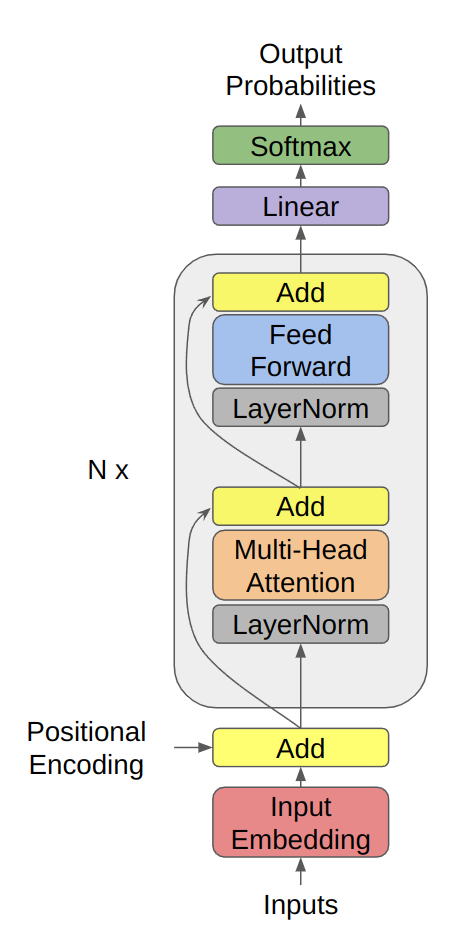

# Tools

In [1]:
# Basic imports
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from tqdm.notebook import tqdm
from collections import namedtuple
np.random.seed(42)
torch.manual_seed(42)

## Dataset generation
The tools below are responsible for generating the dataset. You should not modify them.

### Detailed dataset description
To generate each example, we first create a random Markov chain and sample a sequence of a given length starting at token zero. This Markov chain is specific to the current example.

To create the Markov chain, we follow this algorithm:
1. Generate a random permutation of the numbers P(x) - a bijection that maps each token in the vocabulary to another token.
2. Create a function INC(x) that maps the x-th token to the ((x+1)%N)-th token.
3. For each i-th token (node), create an outgoing edge to P(i) with probability 80% and to INC(i) with probability 20%.

This dataset design ensures that the sequences will be mostly predictable, but not completely. It also introduces learnable concepts that are both dataset-wide (due to the constant INC function) and sample-specific (due to the random P function).

In [2]:
# parameters for dataset generation. If you want to, you can change batch size, but there should be no reason to.
BATCH_SIZE = 128
SEQ_LEN = 64
VOCAB_SIZE = 10

In [3]:
import string

Edge = namedtuple("Edge", "to token prob")

In [4]:
def generate_random(size):
    """
    For generating a random sequence of elements.
    """
    prob = 1.0/size
    graph = {0: [Edge(to=0, token=a, prob=prob) for a in range(size)]}
    return graph

In [5]:
def generate_pseudo_permutation(size, true_prob=1.0):
    assert 0 < size
    assert 0 < true_prob <= 1.0
    permutation = np.random.permutation(size)
    graph = {}
    for v in range(size):
        e1 = Edge(to=(v+1) % size, token=v, prob=1. - true_prob)
        e2 = Edge(to=permutation[v], token=v, prob=true_prob)
        graph[v] = [e1, e2]
    return graph

In [6]:
class SeqGen:
    """
    For generating sequences based on a given Markov chain.
    Markov chain is represented as a directed graph with edges 
    labeled with probabilities and tokens to output
    (dictionary mapping vertex->Edge).
    Assumes that the starting vertex is 0.
    """
    def __init__(self, graph):
        self.graph = graph
        self.current = 0 # we will always start with 0

    def __iter__(self):
        return self

    def __next__(self):
        options = self.graph[self.current]
        probs = list(map(lambda x: x.prob, options))
        choice = np.random.choice(
            list(range(len(options))), size=1, p=probs)[0]
        self.current = options[choice].to
        return options[choice].token

In [7]:
def generate_dataset(gen_factory, seq_len, num_entries):
    """
    For generating datasets with num_entries elements each
    of length seq_len.

      gen_factory is a procedure that returns 
        instance of SeqGen when called.

      seq_len is the length of the sequence to generate.
      
      num_entries is the number of sequences to generate.
    """
    entries = []
    for e in range(num_entries):
        seq_gen = gen_factory()
        seq = []
        for s in range(seq_len + 1):
            seq.append(next(seq_gen))
        entries.append(seq)
    data = torch.tensor(entries, dtype=torch.long)
    x = data[:, :seq_len]
    y = data[:, 1:]       # we predict next token
    return torch.utils.data.TensorDataset(x, y)

In [8]:
def example_generator(gen):
    """
      gen is a procedure that returns a graph describing
      a Markov chain when called.
    """
    def example_gen():
        return SeqGen(gen())
    return example_gen

In [9]:
PERM_EXAMPLE_GENERATOR = example_generator(lambda: generate_pseudo_permutation(
            VOCAB_SIZE, true_prob=0.8))

RANDOM_EXAMPLE_GENERATOR = example_generator(lambda: generate_random(
            VOCAB_SIZE))


TRAIN_DATASET = generate_dataset(
    gen_factory=PERM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=10000)
TEST_DATASET = generate_dataset(
    gen_factory=PERM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=1000)

TRAIN_LOADER = torch.utils.data.DataLoader(
    TRAIN_DATASET, batch_size=BATCH_SIZE)
TEST_LOADER = torch.utils.data.DataLoader(TEST_DATASET, batch_size=BATCH_SIZE)

RANDOM_TRAIN_DATASET = generate_dataset(
    gen_factory=RANDOM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=100)

RANDOM_TEST_DATASET = generate_dataset(
    gen_factory=RANDOM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=100)

RANDOM_TRAIN_LOADER = torch.utils.data.DataLoader(
    RANDOM_TRAIN_DATASET, batch_size=BATCH_SIZE)

RANDOM_TEST_LOADER = torch.utils.data.DataLoader(
    RANDOM_TEST_DATASET, batch_size=BATCH_SIZE)



## Data visualization

In [10]:
for index, x in enumerate(TRAIN_LOADER):
  print(x[0][0])
  if index >= 10:
    break

tensor([0, 1, 2, 5, 2, 5, 6, 9, 6, 9, 0, 1, 1, 1, 1, 1, 1, 2, 5, 2, 5, 2, 3, 0,
        8, 9, 6, 7, 8, 3, 0, 8, 3, 4, 7, 4, 5, 2, 3, 0, 8, 3, 0, 8, 3, 4, 7, 4,
        7, 4, 7, 4, 5, 6, 7, 4, 7, 4, 7, 4, 7, 4, 5, 2])
tensor([0, 3, 6, 2, 9, 8, 1, 7, 0, 3, 6, 2, 3, 6, 2, 9, 8, 1, 2, 9, 8, 1, 7, 0,
        1, 7, 0, 3, 6, 2, 9, 0, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
        5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4])
tensor([0, 2, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 3, 0, 2,
        1, 3, 0, 2, 1, 3, 4, 4, 4, 4, 5, 6, 9, 5, 6, 9, 5, 6, 9, 5, 6, 9, 5, 6,
        9, 0, 1, 3, 0, 2, 1, 3, 0, 2, 3, 4, 4, 4, 5, 6])
tensor([0, 6, 5, 3, 4, 9, 4, 9, 0, 6, 7, 1, 8, 7, 1, 8, 7, 1, 8, 7, 1, 8, 7, 8,
        7, 1, 8, 9, 4, 9, 0, 6, 5, 6, 5, 3, 4, 5, 3, 2, 3, 2, 0, 6, 5, 3, 2, 0,
        6, 7, 8, 9, 4, 5, 3, 2, 3, 2, 3, 4, 9, 4, 9, 4])
tensor([0, 8, 4, 2, 7, 8, 4, 2, 7, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 8, 4, 2, 7,
        6, 0, 8, 4, 2, 7, 6, 0, 8, 9, 9, 0, 8, 4, 5,

In [11]:
import networkx as nx

def plot_graph(graph):
    """
    Draws the graph that describes a Markov chain.
    """
    edg_list = []
    edg_labels = {}
    for v, out_edg in graph.items():
        for edg in out_edg:
            t = (v, edg.to)
            tr = (edg.to, v)
            text = f"{v}→{edg.to} = {edg.prob:.2f}"
            if t in edg_labels:
                edg_labels[t] += "\n" + text
            elif tr in edg_labels:
                edg_labels[tr] += "\n" + text
            else:
                edg_labels[t] = text
            edg_list.append(t)
    G = nx.DiGraph(directed=True)
    G.add_edges_from(edg_list)
    pos = nx.nx_pydot.graphviz_layout(G)
    fig = plt.figure(1, figsize=(300, 120), dpi=30)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edg_labels, font_size=120)
    nx.draw_networkx(G, pos, node_size=50000, arrows=True, arrowsize=200)
    nx.draw_networkx_labels(G, pos, font_size=120)

Below you can find some visualizations of the data.

[0, 1, 8, 1, 2, 4, 2, 3, 5, 6, 7, 6, 7, 6, 9, 0, 3, 4, 5, 6, 9, 0, 1, 8, 1, 8, 1, 8, 1, 8, 1, 8, 9, 0, 3, 5, 7, 6, 7, 6, 9, 0, 1, 8, 1, 8, 1, 8, 1, 8, 1, 8, 1, 8, 1, 2, 3, 4, 2, 4, 5, 7, 6, 9]


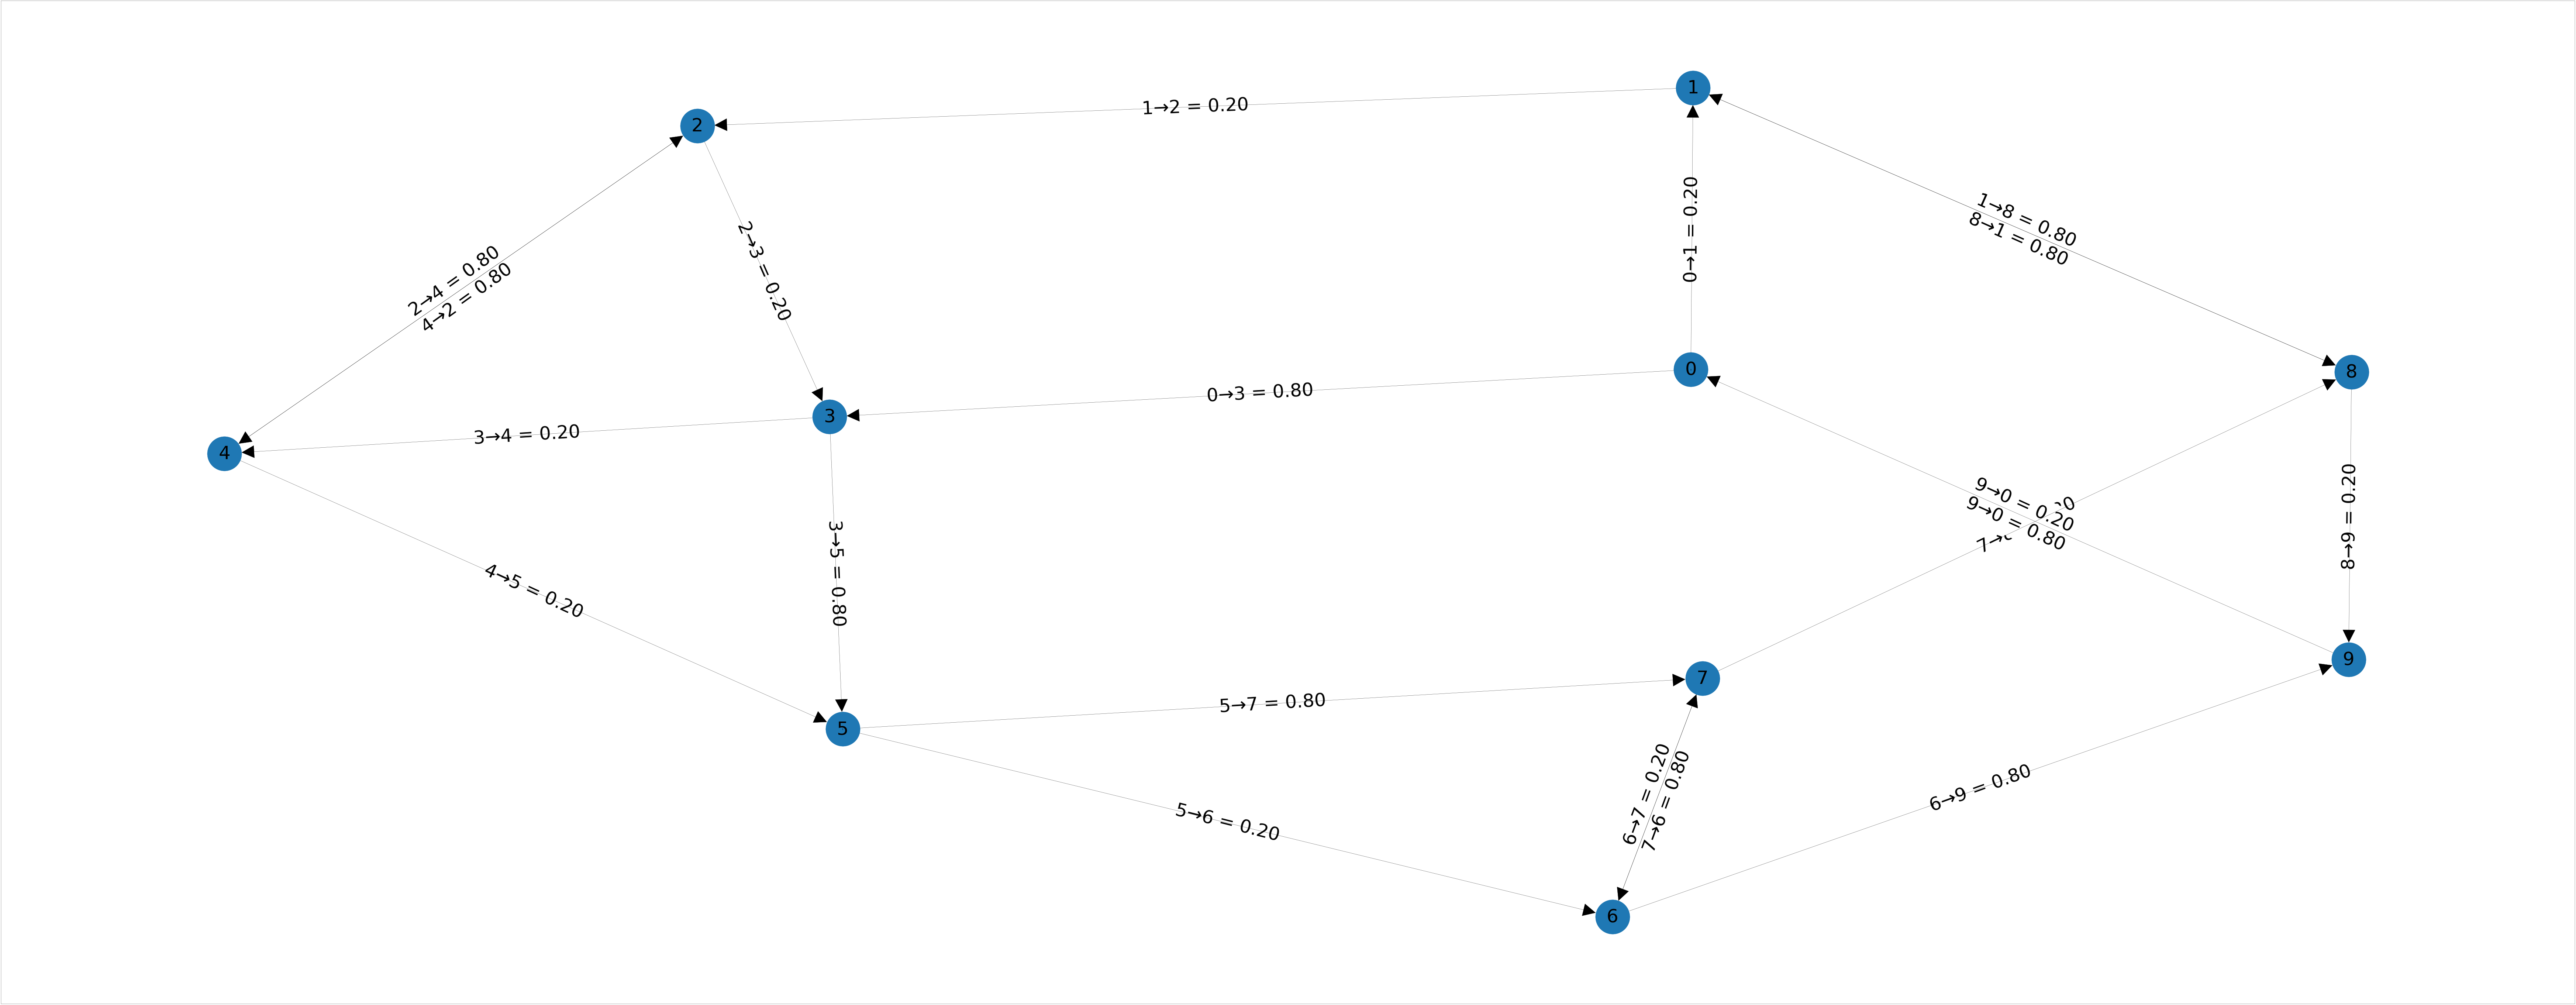

In [12]:
graph = generate_pseudo_permutation(10, true_prob=0.8)
plot_graph(graph)
data = [x for i, x in zip(range(SEQ_LEN), SeqGen(graph))]
print(data)

# Main part

In [13]:
if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
    print("Ok we have cuda capable device")
else:
    DEVICE = torch.device("cpu")
    print("No cuda capable device. If you are running the code in Colab, you can enable a GPU by going to Runtime -> Change runtime type -> GPU.")
    print(" If you are running the code locally, you may need to install additional drivers and libraries, such as cuDNN, to enable GPU support.")


Ok we have cuda capable device


Before implementing the Transformer part of the model, you may (but don't have to) revisit the implementation of the softmax function. This can help you with the efficient implementation of the causal mask later on. 

In [14]:
def stable_softmax(x, dim):
    pass
    return None


# test_input = torch.arange(128, dtype=torch.float).reshape(2, 4, 16)
# assert torch.isclose(stable_softmax(test_input + 10.0**4, dim=-1),
#                      stable_softmax(test_input, dim=-1)).all()
# assert torch.isclose(stable_softmax(test_input, dim=-1),
#                      torch.nn.functional.softmax(test_input, dim=-1)).all()
# assert torch.isclose(stable_softmax(test_input, dim=-2),
#                      torch.nn.functional.softmax(test_input, dim=-2)).all()
# assert torch.isclose(stable_softmax(test_input, dim=0),
#                      torch.nn.functional.softmax(test_input, dim=0)).all()

## The architecture

Implement a module that performs Multi-Head Attention. For text generation, the module should be able to cache calculated keys and values. The cache should be indifferentiable (don't forget `.detach()`). Remember to use the causal mask to ensure that elements can only see themselves and elements that precede them.

In [15]:
import math

MHACache = namedtuple("MHACache", "k v")


class MultiHeadAttention(torch.nn.Module):
    def __init__(self, d_model, num_heads, d_head):
        super().__init__()
        self.d_model=d_model
        self.num_heads=num_heads
        self.d_head=d_head
        self.qkv=nn.Linear(d_model,3*d_head*num_heads)
        self.after=nn.Linear(d_head,d_head)
        self.mask=torch.triu(torch.ones(d_model,d_model)).bool().to(DEVICE)

    def get_empty_cache(self, batch_size):
        return MHACache(k=torch.empty(0, batch_size, self.num_heads, self.d_head, device=DEVICE),
                        v=torch.empty(0, batch_size, self.num_heads, self.d_head, device=DEVICE))

    def forward(self, x, cache):
        """
        x input of shape (seq, batch_size, d_model).

        cache is a MHACache object consisting of keys and values
          of shape (seq', batch_size, head, d_head)

        Returns the result of the attention computation along with the updated
        cache. The attention is calculated separately for each head. The attention
        mechanism used is decoder-style, which means that an element can only
        attend to itself and elements that precede it (including elements in the
        cache). The new cache is created by extending the old cache with the new
        keys and values computed for each head of x.
      
        """
        seq=x.shape[0]
        batch=x.shape[1]
        Q,K,V=self.qkv(x).reshape(seq, batch, self.num_heads, 3*self.d_head).chunk(3,dim=-1) #chop input to Q,K,V
        dim=K.shape[-1]
        mask=torch.triu(torch.ones(seq,seq),diagonal=1).bool().to(DEVICE)# mask 
        logs=(Q.permute(1,2,0,3) @ K.permute(1,2,3,0)/np.sqrt(dim))
        logs=logs.masked_fill_(mask,-10**16) #we repace mask with the smallest value we can
        attention=nn.functional.softmax(logs,dim=-1)
        res=self.after(attention@V.permute(1,2,0,3)).permute(2,0,1,3)
        res=res.reshape(seq,batch,self.d_head*self.num_heads)
        new_k=torch.cat((cache.k,K.detach()),0) # return new cache
        new_v=torch.cat((cache.v,V.detach()),0) # return new cache
        return res, MHACache(k=new_k,v=new_v)
    
    def predict(self,x,cache):
        seq=x.shape[0]
        batch=x.shape[1]
        Q,K,V=self.qkv(x).reshape(seq, batch, self.num_heads, 3*self.d_head).chunk(3,dim=-1)
        dim=K.shape[-1]
        k_cache=torch.cat((cache.k,K),0) # append cache with new values
        v_cache=torch.cat((cache.v,V),0) # append cache with new values
        logs=(Q.permute(1,2,0,3) @ k_cache.permute(1,2,3,0)/math.sqrt(dim))
        attention=nn.functional.softmax(logs,dim=-1)
        res=self.after(attention@v_cache.permute(1,2,0,3)).permute(2,0,1,3)
        res=res.reshape(seq,batch,self.d_head*self.num_heads)
        return res,MHACache(k=k_cache,v=v_cache)

Implement a FeedForward layer (pay attention to the place where the activation function is used).

In [16]:
class FeedForward(torch.nn.Module):
    def __init__(self, d_model, d_ff):
        super().__init__()
        self.d_model=d_model
        self.fun=nn.Sequential(nn.Linear(d_model,d_ff),nn.ReLU(),nn.Linear(d_ff,d_model))
    def forward(self, x):
        assert len(x.shape) == 3  # seq, batch, d_model
        assert x.shape[-1] == self.d_model
        assert len(x.shape) == 3  # seq, batch, d_model
        assert x.shape[-1] == self.d_model
        x=self.fun(x)
        return x



Implement `DecoderLayer`: 
* use residual connections as in the image
* use `torch.nn.LayerNorm(d_model)`
* use `MultiHeadAttention` and `FeedForward` that you have implemented above

In [17]:
class DecoderLayer(torch.nn.Module):
    def __init__(self, d_model, d_ff, num_heads, d_head):
        super().__init__()
        self.mha=MultiHeadAttention(d_model,num_heads,d_head)
        self.ff=FeedForward(d_model,d_ff)
        self.norm1=nn.LayerNorm(d_model)
        self.norm2=nn.LayerNorm(d_model)

    def get_empty_cache(self, batch_size):
        return self.mha.get_empty_cache(batch_size)

    def forward(self, x, cache):
        res,cache=self.mha(x,cache)
        res=self.norm1(res)
        x=x+res
        res=self.ff(x)
        res=self.norm2(res)
        x=x+res
        return x, cache
    def predict(self,x,cache):
        res,cache=self.mha.predict(x,cache)
        res=self.norm1(res)
        x=x+res
        res=self.ff(x)
        res=self.norm2(res)
        x=x+res
        return x, cache
    

Implement positional encoding.

In [18]:
def get_positional_encoding(seqlen, hiddendim):
    """
    Returns a matrix P of shape (seqlen, hiddendim) where
    P[i] should be added to the ith element of the input sequence 
    as positional encoding.
    """
    encoding=torch.zeros(seqlen, hiddendim)
    range=torch.arange(0, seqlen).reshape(seqlen,1)
    temp=torch.pow(1000,-torch.arange(0, hiddendim, 2)/hiddendim)
    encoding[:,0::2]=torch.sin(range*temp)
    encoding[:,1::2]=torch.cos(range*temp)

    return encoding.to(DEVICE)

Decoder is already implemented below.

In [19]:
class Decoder(torch.nn.Module):
    def __init__(self, vocab_size, d_model, d_ff, num_heads, d_head, num_layers,POSITIONAL):
        super().__init__()
        self.vocab_size = vocab_size
        self.d_model = d_model
        self.embedding = torch.nn.Embedding(vocab_size, d_model)
        self.dec_layers = torch.nn.ModuleList([
            DecoderLayer(d_model=d_model, d_ff=d_ff, num_heads=num_heads, d_head=d_head) for i in range(num_layers)
        ])
        self.output_layer = torch.nn.Linear(
            d_model, vocab_size, bias=True)
        self.POSITIONAL=POSITIONAL
    def get_empty_cache(self, batch_size):
        return [
            l.get_empty_cache(batch_size) for l in self.dec_layers
        ]

    def forward(self, x, cache, offset=0):
        assert len(x.shape) == 2  # seq, batch
        assert (x < self.vocab_size).all()
        assert len(self.dec_layers) == len(cache)

        x = self.embedding(x)
        if self.POSITIONAL:
          x = x + get_positional_encoding(x.shape[0]+offset, self.d_model)[offset:, None, :]

        new_cache = []
        for l, c in zip(self.dec_layers, cache):
            x, nc = l(x, c)
            new_cache.append(nc)

        x = self.output_layer(x)

        return torch.distributions.Categorical(logits=x), new_cache
    @torch.no_grad()
    def generate(self,x,seq_len,offset=0,sample=False):
        model.eval()
        new_x=[x,]
        x=torch.tensor([x,]).reshape(1,1).to(DEVICE)
        cache=self.get_empty_cache(x.shape[1])
        while len(new_x)<seq_len:
            x=self.embedding(x)
            if self.POSITIONAL:
                x = x + get_positional_encoding(seq_len, self.d_model)[len(new_x)-1, None, :]
            new_cache = []
            for l, c in zip(self.dec_layers, cache):
                x, nc = l.predict(x, c)
                new_cache.append(nc)
            x = self.output_layer(x)
            if sample:
                x=torch.distributions.Categorical(logits=x).sample()
            else:
                x=torch.argmax(x,dim=-1)
            new_x.append(x.item())
            cache=new_cache
        return new_x
    
    @torch.no_grad()
    def generate_inefficient(self,x,seq_len,offset=0,sample=False):
        model.eval()
        new_x=[x,]
        pref=torch.tensor([x,]).reshape(1,1).to(DEVICE)
        cache=self.get_empty_cache(pref.shape[1])
        while len(new_x)<seq_len:
            x=self.embedding(pref)
            if self.POSITIONAL:
                x = x + get_positional_encoding(seq_len, self.d_model)[:x.shape[0], None, :]
            new_cache = []
            for l, c in zip(self.dec_layers, cache):
                x, nc = l(x, c)
                new_cache.append(nc)
            x = self.output_layer(x)
            if sample:
                pred=torch.distributions.Categorical(logits=x).sample()
            else:
                pred=torch.argmax(x,dim=-1)
            pref=torch.cat((pref,pred[-1].reshape(1,1)),dim=0)
            new_x.append(pred[-1].item())
            cache=new_cache
        return new_x



## Training and evaluation

Eval is already implemented, please note that the model expects the input of shape `(seq_len, batch)`.

In [20]:
def take_most_probable(dist):
    return torch.argmax(dist.logits.detach(), dim=-1)

def take_sample(dist):
    return dist.sample()


def eval(model, test_loader):
    model.eval()
    ti = iter(test_loader)

    total = 0
    total_correct = 0
    for td in ti:
        x, y = td
        x = x.to(DEVICE).swapdims(0, 1)
        y = y.to(DEVICE).swapdims(0, 1)
        dist, cache = model(x, model.get_empty_cache(x.shape[1]))

        model_ans = take_most_probable(dist)
        assert model_ans.shape == y.shape
        total_correct += (model_ans == y).sum().cpu().item()
        total += np.prod(y.shape)

    return total_correct/total

def visual_seq(model,sequence,n):
    model.eval()
    x,y=sequence
    x = x.to(DEVICE).swapdims(0, 1)
    y = y.to(DEVICE).swapdims(0, 1)
    dist,cache=model(x,model.get_empty_cache(x.shape[1]))
    x=x.swapdims(0,1)
    print(x.shape)
    probs=dist.probs.swapdims(0,1)
    for i in range(x.shape[1]):
        print("item: ",x[n,i].item()," predictions: ","".join("{:.2f} ".format(item) for item in 
                                    tuple(map(lambda inde: probs[n,i,inde].item(),range(10)))))

In [21]:
def train(model, train_loader, test_loader, num_epoches):
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    for epoch in range(num_epoches):
        model.train()
        ti = iter(train_loader)
        epoch_total_loss = 0.0
        num_iters = 0
        for td in tqdm(ti):
            x, y = td
            x = x.to(DEVICE).swapdims(0, 1)
            y = y.to(DEVICE).swapdims(0, 1)
            optimizer.zero_grad()
            dist, cache = model(x, model.get_empty_cache(x.shape[1]))

            loss = -dist.log_prob(y).mean()
            loss.backward()
            optimizer.step()

            num_iters += 1
            epoch_total_loss += loss.detach().cpu().item()

        acc = eval(model, test_loader)
        epoch_avg_loss = epoch_total_loss / num_iters
        print(f"EPOCH {epoch} loss:{epoch_avg_loss} acc:{acc:.4f}")


In [22]:
def train_with_save(params, train_loader, test_loader, num_epoches):
    model = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=params[1],
                POSITIONAL=params[0])
    model.to(DEVICE)
    odp=np.zeros([num_epoches,3])
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    for epoch in range(num_epoches):
        model.train()
        ti = iter(train_loader)
        epoch_total_loss = 0.0
        num_iters = 0
        for td in ti:
            x, y = td
            x = x.to(DEVICE).swapdims(0, 1)
            y = y.to(DEVICE).swapdims(0, 1)
            optimizer.zero_grad()
            dist, cache = model(x, model.get_empty_cache(x.shape[1]))

            loss = -dist.log_prob(y).mean()
            loss.backward()
            optimizer.step()

            num_iters += 1
            epoch_total_loss += loss.detach().cpu().item()

        acc = eval(model, test_loader)
        epoch_avg_loss = epoch_total_loss / num_iters
        odp[epoch][0]=epoch+1
        odp[epoch][1]=epoch_avg_loss
        odp[epoch][2]=acc
    return odp
        #print(f"EPOCH {epoch} loss:{epoch_avg_loss} acc:{acc:.4f}")

Train the model on the dataset.

In [23]:
BATCH_SIZE = 128
HIDDEN_DIM = 64
HIDDEN_FF = HIDDEN_DIM * 4
NUM_HEADS = 4
HEAD_DIM = HIDDEN_DIM // NUM_HEADS
NUM_LAYERS = 5
LR = 0.001
POSITIONAL = True

model = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS,
               POSITIONAL=POSITIONAL)

model.to(DEVICE)
train(model, TRAIN_LOADER, TEST_LOADER, 50)

  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 0 loss:2.3105397164067134 acc:0.2837


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 1 loss:2.130442257168927 acc:0.3131


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 2 loss:1.9915497453906867 acc:0.3444


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 3 loss:1.8235494607611547 acc:0.4815


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 4 loss:1.0519138695318488 acc:0.7046


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 5 loss:0.8148675628855259 acc:0.7133


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 6 loss:0.7730841470670097 acc:0.7170


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 7 loss:0.7521289209776287 acc:0.7191


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 8 loss:0.7391643561894381 acc:0.7206


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 9 loss:0.7300065967101085 acc:0.7200


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 10 loss:0.7229718633844883 acc:0.7219


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 11 loss:0.7170276687115054 acc:0.7225


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 12 loss:0.7135419558875168 acc:0.7224


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 13 loss:0.7101691787755942 acc:0.7228


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 14 loss:0.7067087556742415 acc:0.7228


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 15 loss:0.7038384381728836 acc:0.7238


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 16 loss:0.701396401924423 acc:0.7233


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 17 loss:0.6993252318116683 acc:0.7239


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 18 loss:0.6968687674667262 acc:0.7240


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 19 loss:0.6957351308834704 acc:0.7245


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 20 loss:0.6951954598668255 acc:0.7222


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 21 loss:0.694329572629325 acc:0.7230


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 22 loss:0.6928009941608091 acc:0.7236


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 23 loss:0.6897833385045016 acc:0.7233


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 24 loss:0.6877913807011857 acc:0.7223


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 25 loss:0.6859576460681384 acc:0.7220


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 26 loss:0.684347127057329 acc:0.7216


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 27 loss:0.6830389507209198 acc:0.7207


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 28 loss:0.6822242352026927 acc:0.7220


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 29 loss:0.6810472203960901 acc:0.7217


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 30 loss:0.679597461525398 acc:0.7206


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 31 loss:0.6791357156596606 acc:0.7204


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 32 loss:0.6781305599061749 acc:0.7199


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 33 loss:0.6767979260486893 acc:0.7209


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 34 loss:0.6744248655777944 acc:0.7199


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 35 loss:0.6739171169981172 acc:0.7197


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 36 loss:0.6732559332364723 acc:0.7193


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 37 loss:0.6714778731140909 acc:0.7176


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 38 loss:0.6703089147428923 acc:0.7174


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 39 loss:0.6695775348174421 acc:0.7179


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 40 loss:0.6690344636953329 acc:0.7174


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 41 loss:0.6672164314909826 acc:0.7155


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 42 loss:0.6658573305305047 acc:0.7156


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 43 loss:0.6649696340289297 acc:0.7151


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 44 loss:0.6639281737653515 acc:0.7134


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 45 loss:0.6633239094215103 acc:0.7124


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 46 loss:0.6629535684102699 acc:0.7121


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 47 loss:0.6624659960028492 acc:0.7112


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 48 loss:0.661266643035261 acc:0.7131


  0%|          | 0/79 [00:00<?, ?it/s]

EPOCH 49 loss:0.6597644241550301 acc:0.7138


Make sure your model is not cheating (that is an element cannot attend to the next element). To do this check that accuracy on the random dataset is around 10% .

In [24]:
model_test = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS,
                POSITIONAL=POSITIONAL)

model_test.to(DEVICE)
train(model_test, RANDOM_TRAIN_LOADER, RANDOM_TEST_LOADER, 201)

  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 0 loss:3.64556884765625 acc:0.0922


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 1 loss:3.615238666534424 acc:0.0952


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 2 loss:3.618098020553589 acc:0.0986


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 3 loss:3.532294750213623 acc:0.0966


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 4 loss:3.2953877449035645 acc:0.1019


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 5 loss:2.989797353744507 acc:0.1022


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 6 loss:2.77604341506958 acc:0.0967


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 7 loss:2.6429028511047363 acc:0.0972


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 8 loss:2.533353567123413 acc:0.1027


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 9 loss:2.4585916996002197 acc:0.1033


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 10 loss:2.4679858684539795 acc:0.0955


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 11 loss:2.5358946323394775 acc:0.0967


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 12 loss:2.485818386077881 acc:0.1067


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 13 loss:2.431816577911377 acc:0.1023


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 14 loss:2.3935930728912354 acc:0.0991


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 15 loss:2.3594918251037598 acc:0.0991


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 16 loss:2.3621509075164795 acc:0.1027


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 17 loss:2.3877134323120117 acc:0.1056


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 18 loss:2.383159637451172 acc:0.1067


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 19 loss:2.3591959476470947 acc:0.1077


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 20 loss:2.3552870750427246 acc:0.1081


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 21 loss:2.363600015640259 acc:0.1080


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 22 loss:2.3536086082458496 acc:0.1066


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 23 loss:2.329394817352295 acc:0.1064


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 24 loss:2.314081907272339 acc:0.1048


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 25 loss:2.312937021255493 acc:0.1033


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 26 loss:2.315568208694458 acc:0.1014


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 27 loss:2.314319610595703 acc:0.1003


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 28 loss:2.3118839263916016 acc:0.1034


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 29 loss:2.3139920234680176 acc:0.1027


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 30 loss:2.3173623085021973 acc:0.1019


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 31 loss:2.3130834102630615 acc:0.1030


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 32 loss:2.3018879890441895 acc:0.1033


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 33 loss:2.2939794063568115 acc:0.1034


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 34 loss:2.2934885025024414 acc:0.1045


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 35 loss:2.294590473175049 acc:0.1070


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 36 loss:2.2930243015289307 acc:0.1050


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 37 loss:2.291414260864258 acc:0.1045


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 38 loss:2.2920427322387695 acc:0.1033


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 39 loss:2.2922027111053467 acc:0.1031


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 40 loss:2.2893857955932617 acc:0.1033


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 41 loss:2.285489559173584 acc:0.1034


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 42 loss:2.283385992050171 acc:0.1047


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 43 loss:2.2826499938964844 acc:0.1025


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 44 loss:2.281273365020752 acc:0.1037


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 45 loss:2.27938175201416 acc:0.1036


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 46 loss:2.2783162593841553 acc:0.1053


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 47 loss:2.277806043624878 acc:0.1030


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 48 loss:2.2766685485839844 acc:0.1050


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 49 loss:2.275076389312744 acc:0.1075


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 50 loss:2.273982286453247 acc:0.1053


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 51 loss:2.273195505142212 acc:0.1041


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 52 loss:2.2717251777648926 acc:0.1025


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 53 loss:2.269794225692749 acc:0.1014


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 54 loss:2.268465757369995 acc:0.1017


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 55 loss:2.2676568031311035 acc:0.1008


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 56 loss:2.2665700912475586 acc:0.1013


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 57 loss:2.265366315841675 acc:0.1005


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 58 loss:2.26456618309021 acc:0.1014


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 59 loss:2.26373291015625 acc:0.1013


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 60 loss:2.2622945308685303 acc:0.0994


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 61 loss:2.2607383728027344 acc:0.1013


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 62 loss:2.2596237659454346 acc:0.1022


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 63 loss:2.2585630416870117 acc:0.0997


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 64 loss:2.2572479248046875 acc:0.1009


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 65 loss:2.256089687347412 acc:0.1022


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 66 loss:2.2552123069763184 acc:0.1031


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 67 loss:2.254115343093872 acc:0.1033


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 68 loss:2.2527096271514893 acc:0.1023


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 69 loss:2.251415252685547 acc:0.1033


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 70 loss:2.2502262592315674 acc:0.1017


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 71 loss:2.2488718032836914 acc:0.1006


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 72 loss:2.247544288635254 acc:0.0998


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 73 loss:2.246415376663208 acc:0.0992


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 74 loss:2.2452073097229004 acc:0.0986


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 75 loss:2.243832588195801 acc:0.1000


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 76 loss:2.242497205734253 acc:0.0998


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 77 loss:2.241178035736084 acc:0.1002


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 78 loss:2.2397639751434326 acc:0.1002


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 79 loss:2.2383687496185303 acc:0.1025


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 80 loss:2.236997127532959 acc:0.1028


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 81 loss:2.2355566024780273 acc:0.1034


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 82 loss:2.2341012954711914 acc:0.1017


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 83 loss:2.232651710510254 acc:0.1016


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 84 loss:2.2311384677886963 acc:0.1017


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 85 loss:2.2296056747436523 acc:0.1017


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 86 loss:2.2280595302581787 acc:0.1023


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 87 loss:2.2264420986175537 acc:0.1030


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 88 loss:2.2248244285583496 acc:0.1030


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 89 loss:2.223196268081665 acc:0.1027


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 90 loss:2.2215001583099365 acc:0.1017


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 91 loss:2.2197811603546143 acc:0.1013


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 92 loss:2.2180283069610596 acc:0.1019


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 93 loss:2.216207265853882 acc:0.1017


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 94 loss:2.214358329772949 acc:0.1031


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 95 loss:2.212463617324829 acc:0.1023


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 96 loss:2.210508346557617 acc:0.1017


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 97 loss:2.2085139751434326 acc:0.1019


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 98 loss:2.20646333694458 acc:0.1025


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 99 loss:2.2043473720550537 acc:0.1023


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 100 loss:2.202179193496704 acc:0.1023


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 101 loss:2.1999566555023193 acc:0.1016


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 102 loss:2.197660207748413 acc:0.1016


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 103 loss:2.1952879428863525 acc:0.1016


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 104 loss:2.1928765773773193 acc:0.1017


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 105 loss:2.190377712249756 acc:0.1016


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 106 loss:2.187816858291626 acc:0.1016


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 107 loss:2.1851558685302734 acc:0.1022


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 108 loss:2.182398557662964 acc:0.1016


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 109 loss:2.179551124572754 acc:0.1002


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 110 loss:2.1766061782836914 acc:0.1000


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 111 loss:2.1735663414001465 acc:0.0984


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 112 loss:2.170433521270752 acc:0.0970


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 113 loss:2.1671783924102783 acc:0.0969


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 114 loss:2.163815498352051 acc:0.0970


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 115 loss:2.1603145599365234 acc:0.0964


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 116 loss:2.1566665172576904 acc:0.0969


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 117 loss:2.152885913848877 acc:0.0978


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 118 loss:2.148961067199707 acc:0.0978


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 119 loss:2.14485239982605 acc:0.0977


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 120 loss:2.1405649185180664 acc:0.0972


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 121 loss:2.1360855102539062 acc:0.0970


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 122 loss:2.1313884258270264 acc:0.0958


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 123 loss:2.12648868560791 acc:0.0959


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 124 loss:2.121354341506958 acc:0.0955


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 125 loss:2.1160008907318115 acc:0.0966


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 126 loss:2.1103365421295166 acc:0.0966


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 127 loss:2.1044347286224365 acc:0.0963


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 128 loss:2.098278522491455 acc:0.0964


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 129 loss:2.0918405055999756 acc:0.0961


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 130 loss:2.085594654083252 acc:0.0964


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 131 loss:2.082123041152954 acc:0.0997


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 132 loss:2.0883498191833496 acc:0.0975


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 133 loss:2.1072211265563965 acc:0.0995


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 134 loss:2.081143379211426 acc:0.0977


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 135 loss:2.051891803741455 acc:0.0981


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 136 loss:2.059049606323242 acc:0.0975


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 137 loss:2.051666498184204 acc:0.0967


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 138 loss:2.029918670654297 acc:0.0955


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 139 loss:2.029315710067749 acc:0.0952


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 140 loss:2.023073434829712 acc:0.0956


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 141 loss:2.0067694187164307 acc:0.0977


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 142 loss:1.9968581199645996 acc:0.0972


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 143 loss:1.991849422454834 acc:0.0984


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 144 loss:1.9860663414001465 acc:0.0969


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 145 loss:1.9687740802764893 acc:0.0925


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 146 loss:1.9533147811889648 acc:0.0977


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 147 loss:1.9538283348083496 acc:0.0948


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 148 loss:1.9661515951156616 acc:0.0986


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 149 loss:1.9751461744308472 acc:0.0977


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 150 loss:1.9445255994796753 acc:0.0967


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 151 loss:1.952193260192871 acc:0.0994


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 152 loss:1.945369839668274 acc:0.0977


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 153 loss:1.9197900295257568 acc:0.1022


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 154 loss:1.958177089691162 acc:0.0983


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 155 loss:1.897524118423462 acc:0.0984


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 156 loss:1.9587010145187378 acc:0.0961


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 157 loss:1.8394001722335815 acc:0.0964


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 158 loss:1.877087950706482 acc:0.0948


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 159 loss:1.8202288150787354 acc:0.0967


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 160 loss:1.8393348455429077 acc:0.0980


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 161 loss:1.788490891456604 acc:0.0956


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 162 loss:1.7965880632400513 acc:0.0956


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 163 loss:1.7751526832580566 acc:0.0967


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 164 loss:1.7342731952667236 acc:0.0970


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 165 loss:1.740762710571289 acc:0.0969


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 166 loss:1.7046706676483154 acc:0.0970


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 167 loss:1.701170563697815 acc:0.0991


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 168 loss:1.664617896080017 acc:0.0958


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 169 loss:1.647484540939331 acc:0.0970


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 170 loss:1.6233325004577637 acc:0.0973


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 171 loss:1.6110543012619019 acc:0.0995


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 172 loss:1.658774495124817 acc:0.0988


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 173 loss:1.9460864067077637 acc:0.1027


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 174 loss:2.3153538703918457 acc:0.1044


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 175 loss:2.564492702484131 acc:0.0975


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 176 loss:2.1540746688842773 acc:0.0981


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 177 loss:2.0812828540802 acc:0.1000


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 178 loss:1.9654909372329712 acc:0.1002


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 179 loss:2.028733253479004 acc:0.1014


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 180 loss:1.8689974546432495 acc:0.0992


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 181 loss:1.8923985958099365 acc:0.0973


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 182 loss:1.843374252319336 acc:0.1008


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 183 loss:1.79256010055542 acc:0.0981


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 184 loss:1.7569820880889893 acc:0.1016


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 185 loss:1.7526912689208984 acc:0.1023


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 186 loss:1.7284088134765625 acc:0.0997


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 187 loss:1.699862003326416 acc:0.0995


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 188 loss:1.668282151222229 acc:0.1014


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 189 loss:1.6504336595535278 acc:0.0997


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 190 loss:1.6222115755081177 acc:0.0977


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 191 loss:1.588459849357605 acc:0.1019


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 192 loss:1.5733647346496582 acc:0.1017


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 193 loss:1.5541188716888428 acc:0.0977


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 194 loss:1.5202114582061768 acc:0.1002


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 195 loss:1.4969100952148438 acc:0.1000


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 196 loss:1.4850432872772217 acc:0.1002


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 197 loss:1.453675389289856 acc:0.0977


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 198 loss:1.4264907836914062 acc:0.0973


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 199 loss:1.4018813371658325 acc:0.0980


  0%|          | 0/1 [00:00<?, ?it/s]

EPOCH 200 loss:1.3850677013397217 acc:0.0983


Choose a prefix of an arbitrary sequence from the test set (you can also write your sequence, just remember that every sequence starts with token 0). For each position in this sequence print the probability distribution over the next token according to the model. Analyze the results.

In [25]:
visual_seq(model,next(iter(TEST_LOADER)),2)

torch.Size([128, 64])
item:  0  predictions:  0.09 0.29 0.07 0.06 0.10 0.09 0.09 0.06 0.07 0.08 
item:  1  predictions:  0.10 0.06 0.27 0.08 0.09 0.08 0.12 0.06 0.07 0.08 
item:  2  predictions:  0.10 0.07 0.05 0.27 0.10 0.08 0.08 0.05 0.11 0.10 
item:  7  predictions:  0.11 0.07 0.04 0.07 0.15 0.07 0.13 0.00 0.25 0.10 
item:  8  predictions:  0.09 0.07 0.06 0.07 0.14 0.14 0.08 0.00 0.04 0.32 
item:  1  predictions:  0.14 0.00 0.28 0.14 0.09 0.11 0.14 0.00 0.02 0.07 
item:  2  predictions:  0.00 0.00 0.00 0.23 0.00 0.00 0.00 0.76 0.00 0.00 
item:  7  predictions:  0.06 0.00 0.04 0.09 0.11 0.07 0.07 0.00 0.41 0.15 
item:  4  predictions:  0.10 0.00 0.05 0.07 0.00 0.33 0.05 0.00 0.02 0.38 
item:  9  predictions:  0.24 0.00 0.06 0.11 0.00 0.33 0.21 0.00 0.04 0.00 
item:  8  predictions:  0.00 0.91 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.09 
item:  1  predictions:  0.00 0.00 0.95 0.04 0.00 0.00 0.00 0.00 0.00 0.00 
item:  6  predictions:  0.20 0.00 0.05 0.44 0.00 0.13 0.00 0.12 0.00 0.06 
ite

We can see, that more sequences have analysed more we know and our predictions are more accurate. First few tokens
are rather unsure, there are many possible values with high scores. After few tokens this behaviour changes and we 
can see there are only two possible predictions (with scores >0) which is theoreticly motivated due to the data generating process.

In [26]:
next(iter(TEST_LOADER))[0][2]

tensor([0, 1, 2, 7, 8, 1, 2, 7, 4, 9, 8, 1, 6, 0, 3, 2, 3, 2, 7, 4, 5, 5, 6, 0,
        3, 2, 7, 4, 9, 8, 1, 6, 0, 3, 2, 3, 2, 7, 4, 9, 8, 1, 6, 0, 3, 4, 9, 8,
        9, 8, 1, 6, 0, 1, 6, 0, 1, 6, 0, 3, 2, 7, 8, 1])

One may want to know how many elements of a sequence a model needs to see in order to learn the underlying pattern.
To check this write a function that given a model and a data set loader calculates for each position in the range $[0,\text{SEQ_LEN}]$ average model accuracy. Assume that we take the most probable answer.

torch.Size([64, 104])


/tmp/ipykernel_60861/896069989.py:20: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(acc/acc_bottom,marker=".")
/tmp/ipykernel_60861/896069989.py:24: RuntimeWarning: invalid value encountered in true_divide
  return acc/acc_bottom


array([       nan, 0.3045    , 0.32433333, 0.3435    , 0.3604    ,
       0.37533333, 0.38885714, 0.405     , 0.42055556, 0.4361    ,
       0.45227273, 0.46691667, 0.48138462, 0.49378571, 0.50573333,
       0.5173125 , 0.528     , 0.53883333, 0.54805263, 0.55615   ,
       0.56514286, 0.57281818, 0.58004348, 0.58691667, 0.59336   ,
       0.59938462, 0.60659259, 0.61282143, 0.61758621, 0.6232    ,
       0.62812903, 0.63346875, 0.638     , 0.64220588, 0.64545714,
       0.64925   , 0.65286486, 0.65652632, 0.65976923, 0.663025  ,
       0.66639024, 0.66995238, 0.67311628, 0.67540909, 0.67773333,
       0.68026087, 0.68270213, 0.685125  , 0.68738776, 0.68952   ,
       0.69123529, 0.6935    , 0.69581132, 0.69792593, 0.70003636,
       0.70183929, 0.70329825, 0.70491379, 0.70676271, 0.70858333,
       0.70996721, 0.71153226, 0.71249206, 0.71382813])

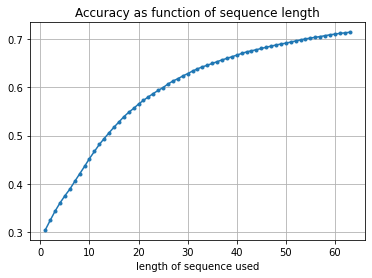

In [27]:
def eval_part(model, test_loader,plot=True):
    model.eval()
    ti = iter(test_loader)

    acc=np.zeros(SEQ_LEN)
    acc_bottom=np.zeros(SEQ_LEN)
    for td in ti:
        x, y = td
        x = x.to(DEVICE).swapdims(0, 1)
        y = y.to(DEVICE).swapdims(0, 1)
        dist, cache = model(x, model.get_empty_cache(x.shape[1]))

        model_ans = take_most_probable(dist)
        assert model_ans.shape == y.shape
        for i in range(1,SEQ_LEN):
            acc[i] += (model_ans[:i+1,:] == y[:i+1,:]).sum().cpu().item()
            acc_bottom[i] += np.prod(y[:i+1,:].shape)
    print(y.shape)
    if plot:
        plt.plot(acc/acc_bottom,marker=".")
        plt.title("Accuracy as function of sequence length")
        plt.xlabel("length of sequence used")
        plt.grid()
    return acc/acc_bottom
eval_part(model,TEST_LOADER)

# Additional experiments, text generation and visualizations 

## Experiments considering number of layers and positional encodings

Positional: True, layers: 0
Positional: True, layers: 1
Positional: True, layers: 2
Positional: True, layers: 3
Positional: True, layers: 4
Positional: False, layers: 0
Positional: False, layers: 1
Positional: False, layers: 2
Positional: False, layers: 3
Positional: False, layers: 4


[]

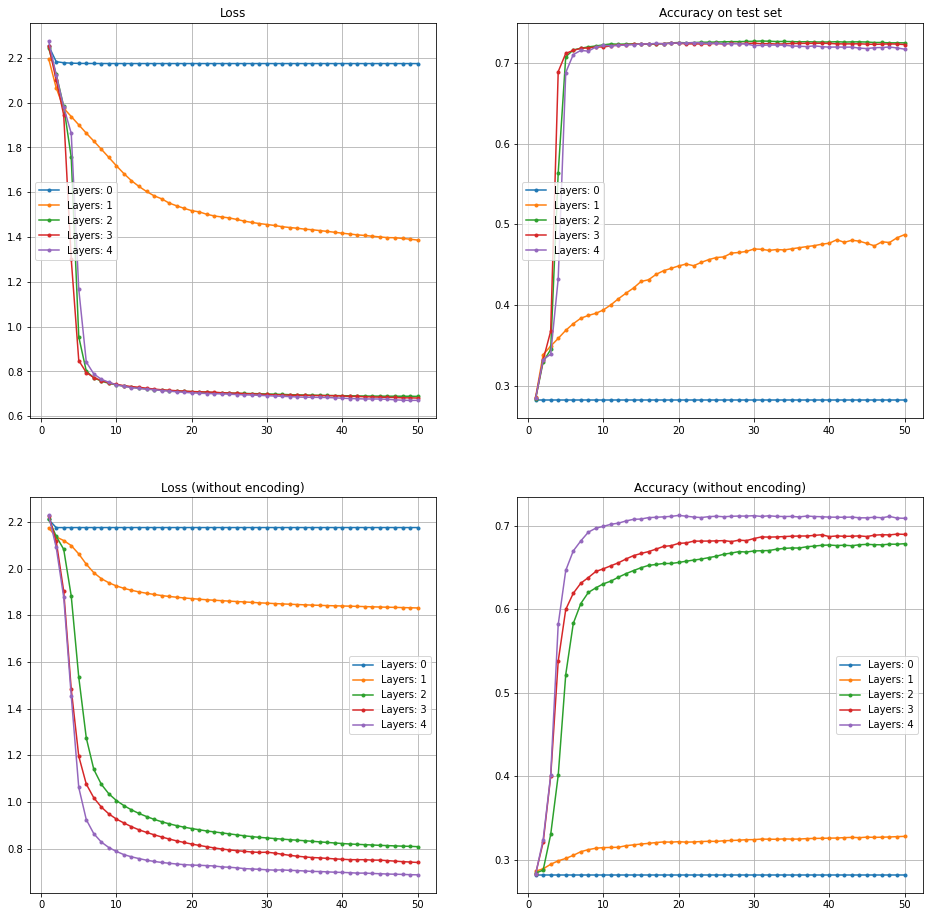

In [28]:
parameters=[[True,0],[True,1],[True,2],[True,3],[True,4],[False,0],[False,1],
           [False,2],[False,3],[False,4]]
fig,axes=plt.subplots(2,2,figsize=(16,16))
for parameter in parameters:
    print("Positional: {}, layers: {}".format(*parameter))
    odp=train_with_save(parameter, TRAIN_LOADER,TEST_LOADER,50)
    pop=2 if not parameter[0] else 0
    ax=axes.flatten()[0+pop]
    ax.plot(odp[:,0],odp[:,1],label="Layers: {}".format(parameter[1]),marker=".")
    ax=axes.flatten()[1+pop]
    ax.plot(odp[:,0],odp[:,2],label="Layers: {}".format(parameter[1]),marker=".")
ax=axes.flatten()[0]
ax.legend()
ax.grid()
ax.set_title("Loss")
ax=axes.flatten()[1]
ax.legend()
ax.grid()
ax.set_title("Accuracy on test set")
ax=axes.flatten()[2]
ax.legend()
ax.grid()
ax.set_title("Loss (without encoding)")
ax=axes.flatten()[3]
ax.legend()
ax.grid()
ax.set_title("Accuracy (without encoding)")
plt.plot()

We can see that without positional encoding we can also achive requiered accuracy but we need more layers in order to acomplish that.

## Text Generation

Use cache to perform efficient text generation. You should generate text token by token. You should consider two choice procedures:
* output the most probable token
* sample from the distribution returned by the model

In [29]:
model.generate(9,16,sample=True) #sampling, eficient

[9, 0, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

In [30]:
model.generate_inefficient(9,16,sample=True) #sampling,control

[9, 2, 3, 2, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 6, 7]

In [31]:
model.generate(9,16,sample=False) #argmax, eficient

[9, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [32]:
model.generate_inefficient(9,16,sample=False) #argmax,control

[9, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

Now lets see how the generation is working for different starting values.

In [33]:
model.generate(0,16,sample=True) #sampling, eficient

[0, 4, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]

In [34]:
model.generate(8,16,sample=True) #sampling, eficient

[8, 9, 0, 1, 2, 3, 4, 5, 6, 0, 5, 6, 0, 5, 6, 0]

In [35]:
model.generate(2,16,sample=True) #sampling, eficient

[2, 3, 3, 4, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]

In [36]:
model.generate(0,16,sample=False) #argmax, eficient

[0, 1, 2, 3, 4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6]

In [37]:
model.generate(8,16,sample=False) #argmax, eficient

[8, 9, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [38]:
model.generate(2,16,sample=False) #argmax, eficient

[2, 3, 3, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5]

We can see that there is common behaviour to produce seqences of the same number.

## Attention visualizations (optional)